In [1]:
import keras
from keras.datasets import mnist
from keras.models import model_from_json
from keras.utils import np_utils
from keras.optimizers import RMSprop

from keras import backend as K
from keras import losses

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
num_classes = 10

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test  = X_test.reshape(10000, 784).astype('float32') / 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [4]:
# モデルを読み込む
model = model_from_json(open('mnist_mlp_model.json').read())

# 学習結果を読み込む
model.load_weights('mnist_mlp_weights.h5')

model.summary();

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
____________________________________________________________

In [5]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.10931811571954518
Test accuracy : 0.9842


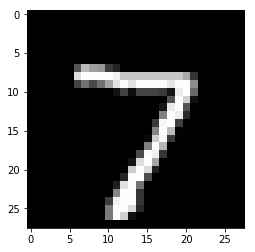

In [6]:
x = X_test[0]
plt.imshow(x.reshape(28,28), 'gray')
plt.show()

In [7]:
y_true = y_test[0].reshape(1,-1)
y_true

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [8]:
y_pred = model.predict(x.reshape(1,-1), batch_size=1)
y_pred

array([[1.3359890e-32, 1.9986496e-20, 5.1875146e-24, 2.8469728e-24,
        1.6181472e-29, 4.0880136e-28, 0.0000000e+00, 1.0000000e+00,
        1.4397638e-30, 2.0887911e-19]], dtype=float32)

In [12]:
X = np.expand_dims(x, axis=0)
X.shape

(1, 784)

In [18]:
 # 予測クラスの算出
predictions = model.predict(X)
class_idx = np.argmax(predictions[0])
class_output = model.output[:, class_idx]

<tf.Tensor 'strided_slice_4:0' shape=(?,) dtype=float32>

In [32]:
#  勾配を取得
grads = K.gradients(class_output, model.input)[0]  # gradients(loss, variables) で、variablesのlossに関しての勾配を返す
gradient_function = K.function([model.input], [grads])  # model.inputを入力すると、gradsを出力する関数

grads_val = gradient_function([X])
print(grads_val)

[array([[ 6.85365537e-20, -8.58350975e-20, -8.82569402e-21,
         1.38035765e-20, -1.50563493e-19, -3.13077457e-20,
        -5.55283760e-22, -1.18435927e-19, -5.90549119e-20,
        -1.13783114e-19,  5.88016848e-20,  7.02014486e-20,
         1.09140860e-20, -8.98080719e-20,  6.10637653e-20,
        -7.25500599e-20,  5.98250882e-20, -8.23470255e-21,
        -1.32553212e-19,  7.38061013e-20,  2.06623739e-20,
        -1.92886783e-19,  1.50921365e-20, -1.44212801e-20,
        -1.08468129e-20,  1.50362436e-19, -1.61144735e-20,
         6.08809325e-20, -1.69426054e-19, -3.30825845e-20,
         1.67529355e-19,  3.59480416e-21, -9.17178574e-20,
         1.39791294e-20, -8.40684982e-20, -5.56461006e-20,
        -3.21051349e-20,  9.38967158e-20,  1.53288355e-19,
         1.04256041e-19, -8.86455923e-20,  4.27575087e-20,
         2.17765739e-19,  2.22574890e-19,  2.23301646e-19,
        -1.86210537e-20,  4.85352974e-20, -4.11680424e-20,
        -1.17008032e-19,  1.32061970e-20,  5.12160832e-

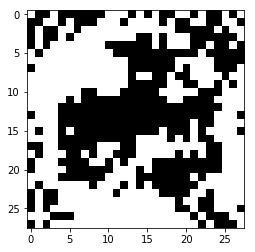

In [33]:
p = np.sign(grads_val)
plt.imshow(p.reshape(28,28), 'gray')
plt.show()

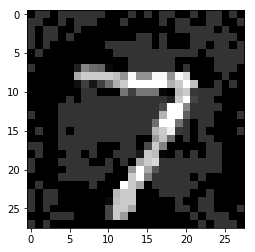

In [52]:
eps = 0.2
adv = (X - eps*p).clip(min=0, max=1).reshape(1, 784)


plt.imshow(adv.reshape(28,28), 'gray')
plt.show()


In [53]:
adv_pred = model.predict(adv, batch_size=1)
adv_pred_class = np.argmax(adv_pred)
adv_pred_per = max(adv_pred[0])
print(adv_pred_class, adv_pred_per)

9 0.9384554
